### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# We'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# We'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module
# Import the citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
cities

['trelleborg',
 'puerto ayora',
 'kiruna',
 'balikpapan',
 'coruripe',
 'busselton',
 'nusaybin',
 'punta arenas',
 'del rio',
 'taolanaro',
 'trincomalee',
 'fort-shevchenko',
 'ushuaia',
 'karwar',
 'mataura',
 'tiksi',
 'vaini',
 'utiroa',
 'misratah',
 'hermanus',
 'cape town',
 'sulangan',
 'miyako',
 'sao bento do sul',
 'san patricio',
 'bowen',
 'rikitea',
 'lolua',
 'barrow',
 'severo-kurilsk',
 'alamosa',
 'concordia',
 'ryotsu',
 'autazes',
 'labytnangi',
 'saint-augustin',
 'rohnert park',
 'new norfolk',
 'pevek',
 'albany',
 'kautokeino',
 'pangnirtung',
 'soyo',
 'atbasar',
 'port alfred',
 'chuy',
 'jamestown',
 'alofi',
 'carnarvon',
 'faanui',
 'cayenne',
 'waingapu',
 'barentsburg',
 'grand gaube',
 'kegayli',
 'hobart',
 'burica',
 'la ligua',
 'kapaa',
 'beidao',
 'georgetown',
 'leshukonskoye',
 'yellowknife',
 'chokurdakh',
 'airai',
 'amderma',
 'provideniya',
 'thompson',
 'hilo',
 'rio grande',
 'spassk',
 'miranda',
 'tuktoyaktuk',
 'concarneau',
 'garmsar',


In [7]:
import requests
requests.__version__

'2.25.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
city_data = []

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trelleborg
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | kiruna
Processing Record 4 of Set 1 | balikpapan
Processing Record 5 of Set 1 | coruripe
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nusaybin
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | del rio
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | trincomalee
Processing Record 12 of Set 1 | fort-shevchenko
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | karwar
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | utiroa
City not found. Skipping...
Processing Record 19 of Set 1 | misratah
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | cape town
Processing Record 22 o

Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | mahon
Processing Record 41 of Set 4 | dalaba
Processing Record 42 of Set 4 | matara
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | trat
Processing Record 45 of Set 4 | saucillo
Processing Record 46 of Set 4 | collinsville
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | tynne
Processing Record 50 of Set 4 | saint-joseph
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | tucupita
Processing Record 3 of Set 5 | nepomuk
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | gaoua
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 5 | neka
Processing Record 10 of Set 5 | constitucion
Processing Record 11 of Set 5 | hofn
Processing

Processing Record 28 of Set 8 | porbandar
Processing Record 29 of Set 8 | givors
Processing Record 30 of Set 8 | pedernales
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | orsha
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | toyooka
Processing Record 35 of Set 8 | reinosa
Processing Record 36 of Set 8 | china
Processing Record 37 of Set 8 | nichinan
Processing Record 38 of Set 8 | portel
Processing Record 39 of Set 8 | hearst
Processing Record 40 of Set 8 | aksu
Processing Record 41 of Set 8 | sayan
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | sarapulka
Processing Record 44 of Set 8 | nioaque
Processing Record 45 of Set 8 | riyadh
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 8 | grindavik
Processing Record 49 of Set 8 | pierre
Processing Record 50 of Set 8 | bitung
Processing Record 1 of Set 9 | phan rang
City not fo

Processing Record 11 of Set 12 | kant
Processing Record 12 of Set 12 | independence
Processing Record 13 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 14 of Set 12 | champerico
Processing Record 15 of Set 12 | manzhouli
Processing Record 16 of Set 12 | codajas
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | tanete
Processing Record 19 of Set 12 | warmbad
Processing Record 20 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 21 of Set 12 | faya
Processing Record 22 of Set 12 | hamilton
Processing Record 23 of Set 12 | solnechnyy
Processing Record 24 of Set 12 | keuruu
Processing Record 25 of Set 12 | pahrump
Processing Record 26 of Set 12 | la romana
Processing Record 27 of Set 12 | khabary
Processing Record 28 of Set 12 | mangan
Processing Record 29 of Set 12 | muros
Processing Record 30 of Set 12 | aksarka
Processing Record 31 of Set 12 | yugorsk
Processing Record 32 of Set 12 | bol
Processing Record 33 of Set 12 | kulhud

In [12]:
len(city_data)

541

### Create a DataFrame

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Trelleborg,55.3751,13.1569,61.95,76,1,5.95,SE,2021-07-23 00:55:03
1,Puerto Ayora,-0.7393,-90.3518,72.55,88,100,7.00,EC,2021-07-23 00:55:03
2,Kiruna,67.8557,20.2251,45.52,71,40,10.36,SE,2021-07-23 00:55:03
3,Balikpapan,-1.2675,116.8289,81.59,83,20,8.05,ID,2021-07-23 00:55:04
4,Coruripe,-10.1256,-36.1756,72.68,83,13,10.49,BR,2021-07-23 00:55:04
...,...,...,...,...,...,...,...,...,...
536,Olinda,-8.0089,-34.8553,71.33,88,75,8.05,BR,2021-07-23 00:58:14
537,Ratnagiri,16.9833,73.3000,80.74,87,100,18.03,IN,2021-07-23 00:58:14
538,Birjand,32.8663,59.2211,68.47,19,0,4.61,IR,2021-07-23 00:55:22
539,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,72.52,96,68,1.95,BR,2021-07-23 00:58:15


In [14]:
# we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, 
# and Wind Speed, so they are easy to read

new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trelleborg,SE,2021-07-23 00:55:03,55.3751,13.1569,61.95,76,1,5.95
1,Puerto Ayora,EC,2021-07-23 00:55:03,-0.7393,-90.3518,72.55,88,100,7.00
2,Kiruna,SE,2021-07-23 00:55:03,67.8557,20.2251,45.52,71,40,10.36
3,Balikpapan,ID,2021-07-23 00:55:04,-1.2675,116.8289,81.59,83,20,8.05
4,Coruripe,BR,2021-07-23 00:55:04,-10.1256,-36.1756,72.68,83,13,10.49
...,...,...,...,...,...,...,...,...,...
536,Olinda,BR,2021-07-23 00:58:14,-8.0089,-34.8553,71.33,88,75,8.05
537,Ratnagiri,IN,2021-07-23 00:58:14,16.9833,73.3000,80.74,87,100,18.03
538,Birjand,IR,2021-07-23 00:55:22,32.8663,59.2211,68.47,19,0,4.61
539,Sao Gabriel Da Cachoeira,BR,2021-07-23 00:58:15,-0.1303,-67.0892,72.52,96,68,1.95


In [17]:
# We'll create an output file to save the DataFrame as a CSV in a new folder for that file

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
# The line in the code block will export the DataFrame to a CSV file
# Index label (or column A) header as "City_ID."
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

In [19]:
# We'll retrieve the data we need to create our scatter plots
# Need latitude, maximum temperature, humidity, cloudiness and wind speed

# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df ["Lat"]
max_temps = city_data_df ["Max Temp"]
humidity = city_data_df ["Humidity"]
cloudiness = city_data_df ["Cloudiness"]
wind_speed = city_data_df ["Wind Speed"]


In [20]:
# To add the current date, we will need to import the time module

# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1627002777.1996114

In [21]:
# We can convert the datetime stamp
today = time.strftime("%x")
today

'07/22/21'

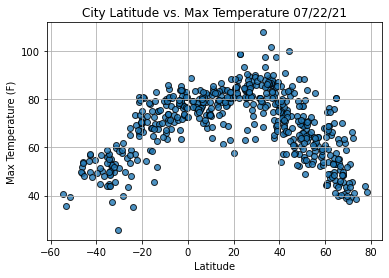

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity


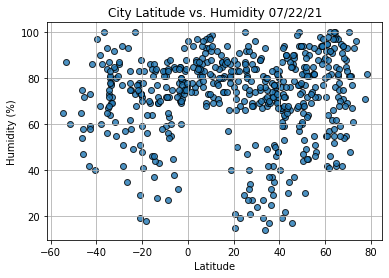

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness


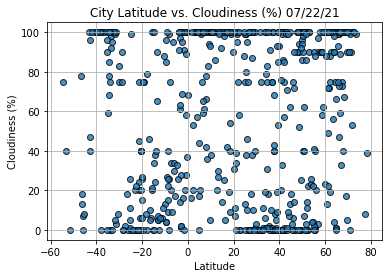

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

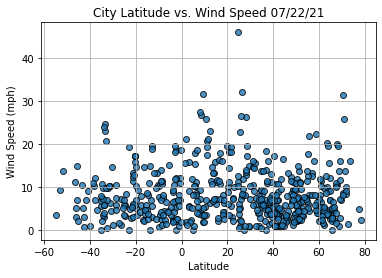

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()